### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
#           'India': 'Blue', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
#           'Spain': 'yellow',
#           'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
#           'Iran': 'brown', 
          'China': 'red', 
#           'New Zealand': 'lightblue'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-24,307231,3473036,590320,449858,221695,127986,125335,116812,108819,87461,4846
2021-05-25,311388,3485788,590941,452031,221960,128001,125501,117197,109040,87733,4846
2021-05-26,315235,3498443,591950,454429,222232,128010,125622,117595,109185,88000,4846
2021-05-27,318895,3511204,593288,456674,222661,128020,125793,117990,109327,88192,4846
2021-05-28,322512,3523117,593963,459045,223072,128030,125919,118386,109452,88360,4846


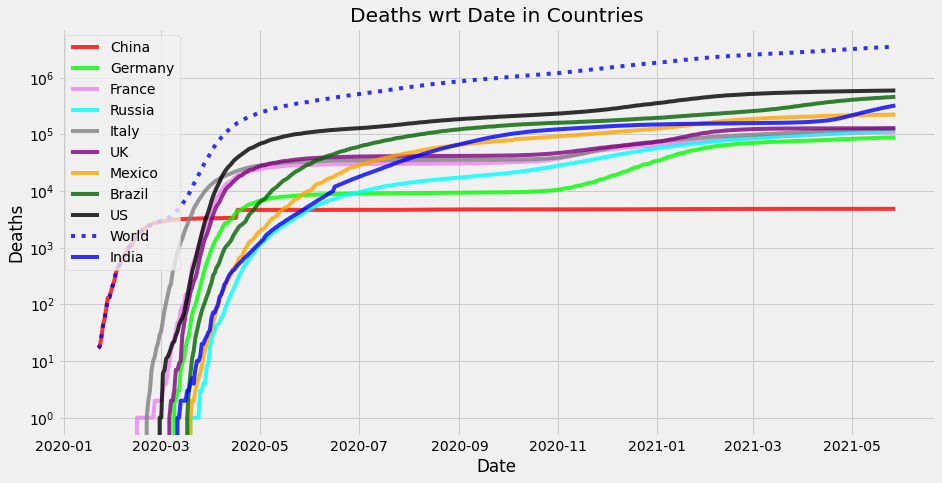

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-24,196427,454300,25925,37498,703,2370,2489,8283,2230,2328,17
2021-05-25,208921,531845,22756,73453,2483,2417,3220,7762,3155,2578,15
2021-05-26,211298,560509,24052,80486,2932,2991,3935,8247,12657,4473,20
2021-05-27,186364,557653,27525,67467,3050,3384,4143,8911,13933,6949,7
2021-05-28,173790,504356,21968,49768,3006,4030,3737,9126,11274,6169,16


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-24,288860,642301,35635,61663,2394,2182,7758,8509,-1764,10966,18
2021-05-25,283530,634937,34776,62449,2400,2197,7455,8459,-1436,10407,18
2021-05-26,278715,629976,34061,63651,2435,2250,7221,8445,-497,10011,18
2021-05-27,272558,625154,33625,63906,2476,2326,7015,8476,464,9807,17
2021-05-28,265974,617101,32848,62963,2512,2439,6797,8519,1185,9564,17


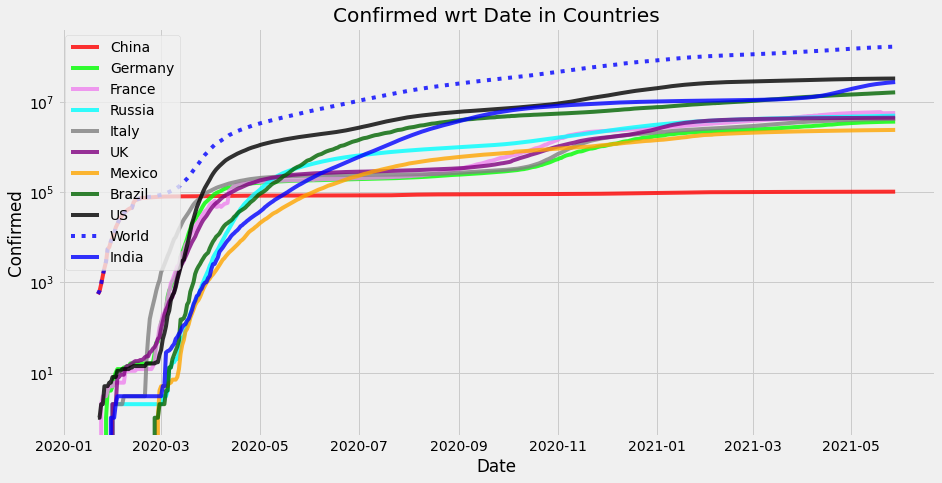

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-24,3511,8824,427,790,48,3,110,315,62,32,0
2021-05-25,4157,12752,621,2173,265,15,166,385,221,272,0
2021-05-26,3847,12655,1009,2398,272,9,121,398,145,267,0
2021-05-27,3660,12761,1338,2245,429,10,171,395,142,192,0
2021-05-28,3617,11913,675,2371,411,10,126,396,125,168,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-24,3972.60,11676.12,528.89,1777.66,179.93,7.61,162.49,358.77,139.71,152.33,0.01
2021-05-25,3995.65,11810.61,540.41,1827.07,190.57,8.53,162.93,362.05,149.87,167.28,0.01
2021-05-26,3977.07,11916.16,598.98,1898.44,200.75,8.59,157.69,366.55,149.26,179.75,0.01
2021-05-27,3937.44,12021.76,691.36,1941.76,229.28,8.77,159.35,370.10,148.36,181.28,0.01
2021-05-28,3897.38,12008.17,689.31,1995.41,251.99,8.92,155.19,373.34,145.44,179.62,0.00


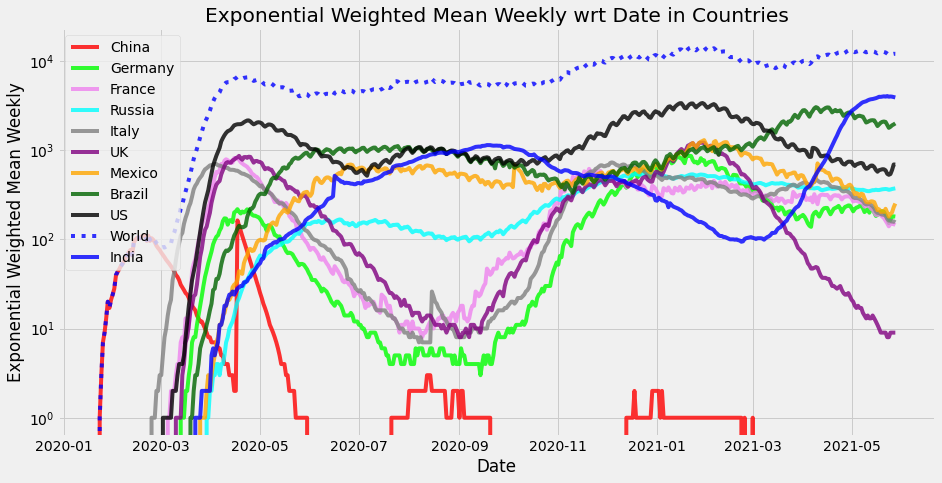

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

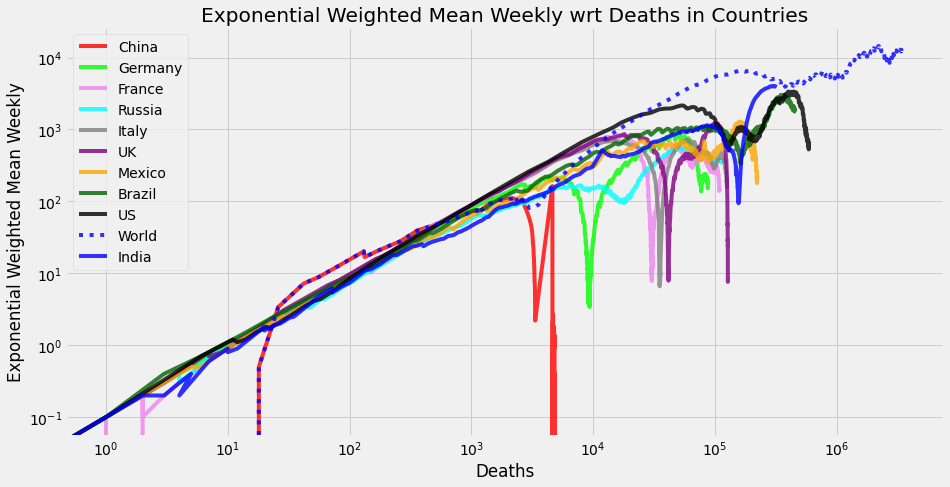

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

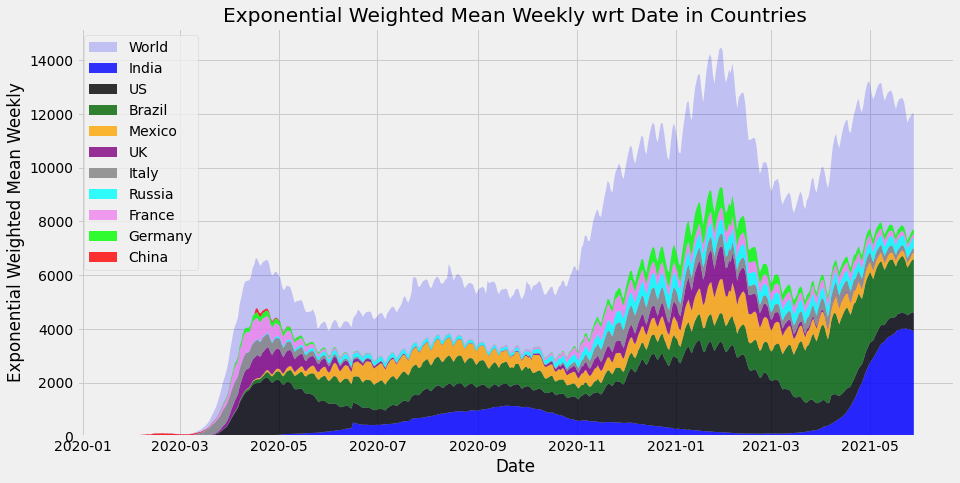

In [20]:
stackplotter(AVG, name)

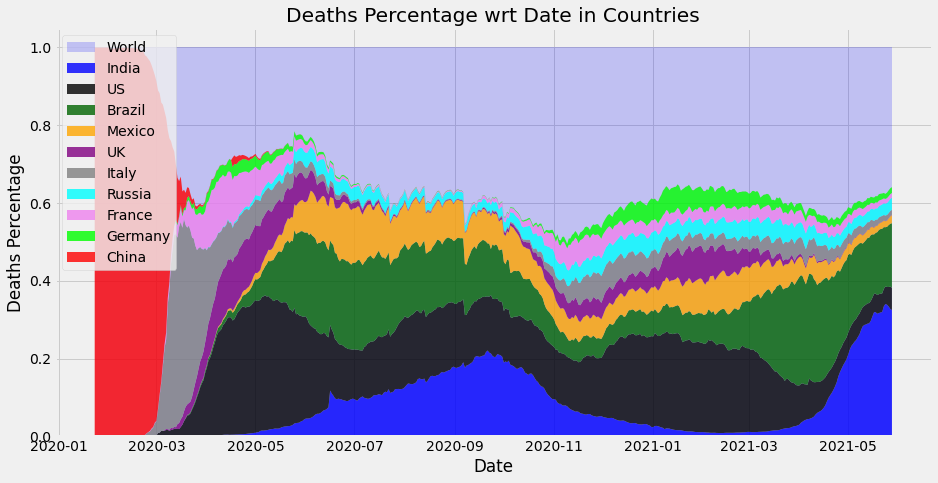

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

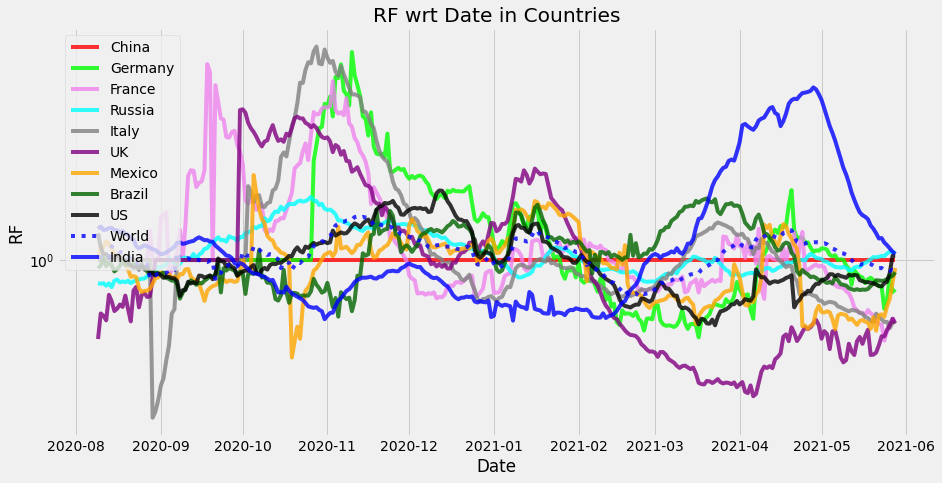

In [23]:
plotter(Reproductivity[200:], 'RF')

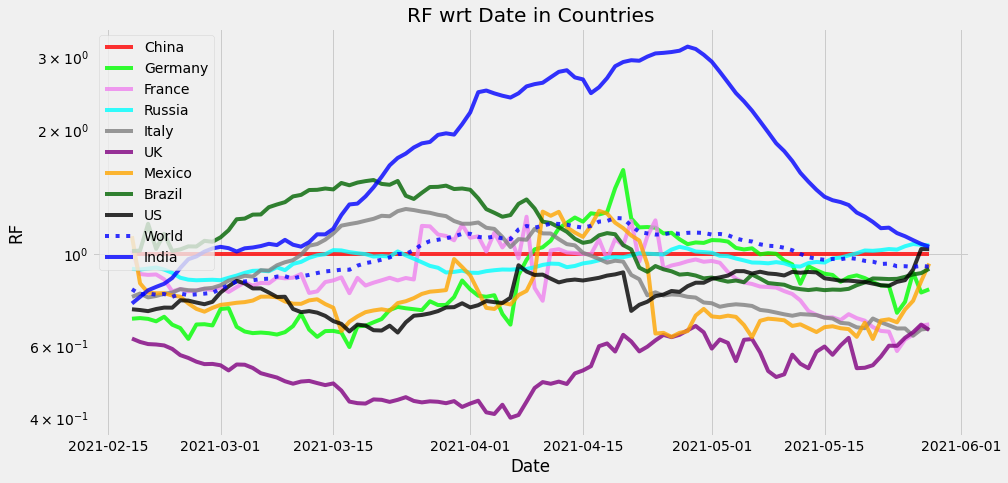

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

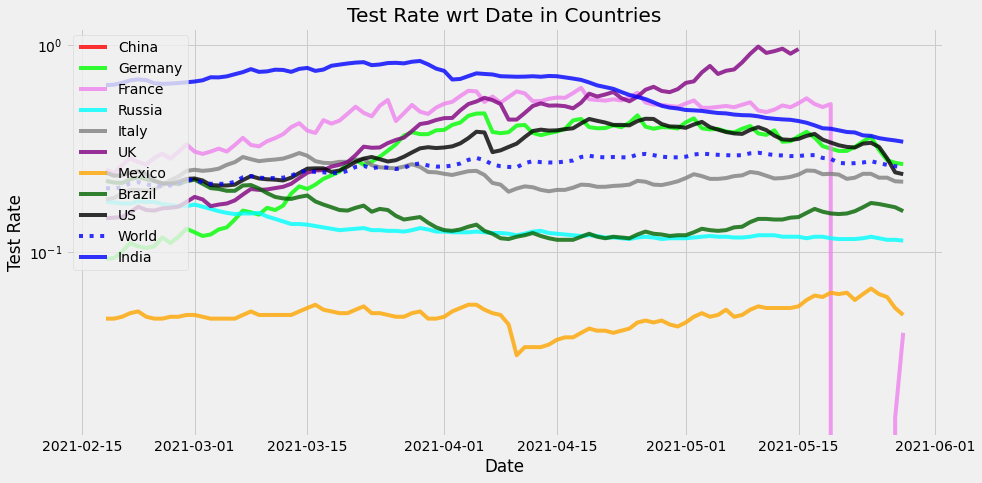

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

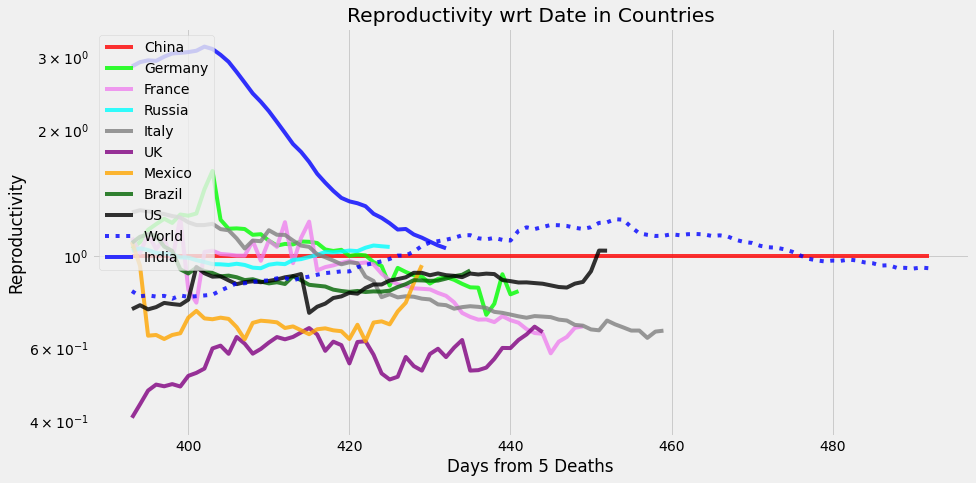

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

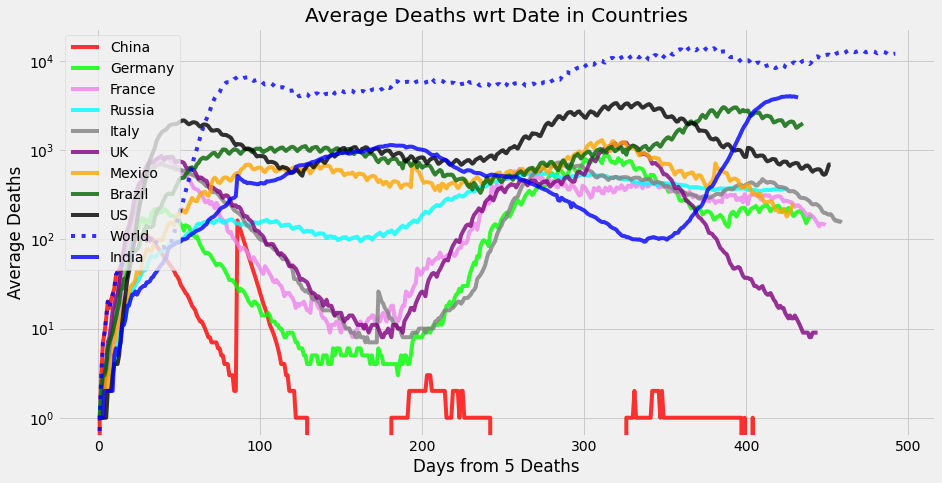

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

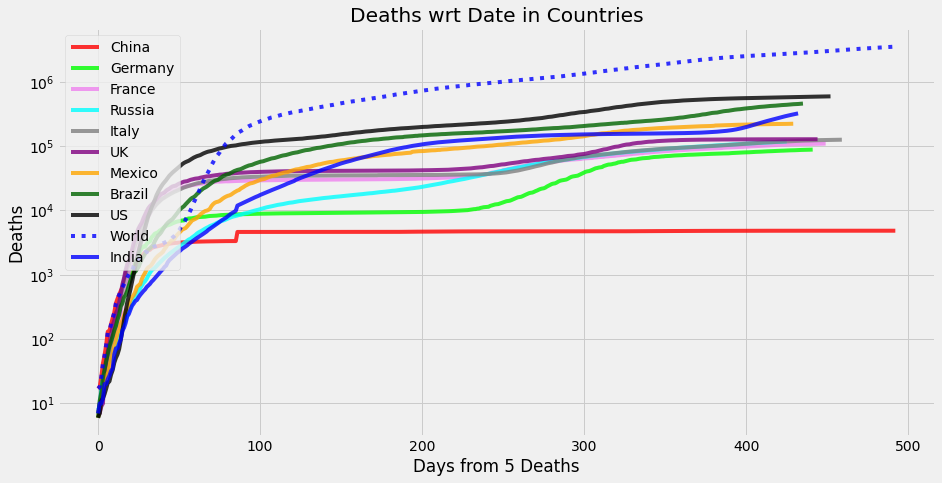

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3523117,11913,11400.43,12008.17,0.9324,169470725,0.257,617101,704.62
US,593963,675,677.14,689.31,1.0278,33239963,0.238,32848,118.79
Brazil,459045,2371,1819.43,1995.41,0.9214,16391930,0.158,62963,91.81
India,322512,3617,3855.29,3897.38,1.0415,27729247,0.341,265974,64.50
Mexico,223072,411,259.43,251.99,0.9484,2408778,0.050,2512,44.61
UK,128030,10,8.29,8.92,0.6549,4493582,NaN,2439,25.61
Italy,125919,126,127.29,155.19,0.6603,4209707,0.219,6797,25.18
Russia,118386,396,374.57,373.34,1.0491,4986458,0.114,8519,23.68
France,109452,125,122.00,145.44,0.6760,5708350,0.041,1185,21.89


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3523117,11913,11400.43,12008.17,0.9324,169470725,0.257,617101,704.62
India,322512,3617,3855.29,3897.38,1.0415,27729247,0.341,265974,64.50
Brazil,459045,2371,1819.43,1995.41,0.9214,16391930,0.158,62963,91.81
US,593963,675,677.14,689.31,1.0278,33239963,0.238,32848,118.79
Colombia,87207,514,498.29,492.92,1.0553,3342567,0.182,17965,17.44
Argentina,76693,558,471.71,493.82,1.1186,3702422,0.281,27779,15.34
Russia,118386,396,374.57,373.34,1.0491,4986458,0.114,8519,23.68
Mexico,223072,411,259.43,251.99,0.9484,2408778,0.050,2512,44.61
Peru,68816,0,223.29,223.69,0.6797,1942054,0.119,5337,13.76


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3523117


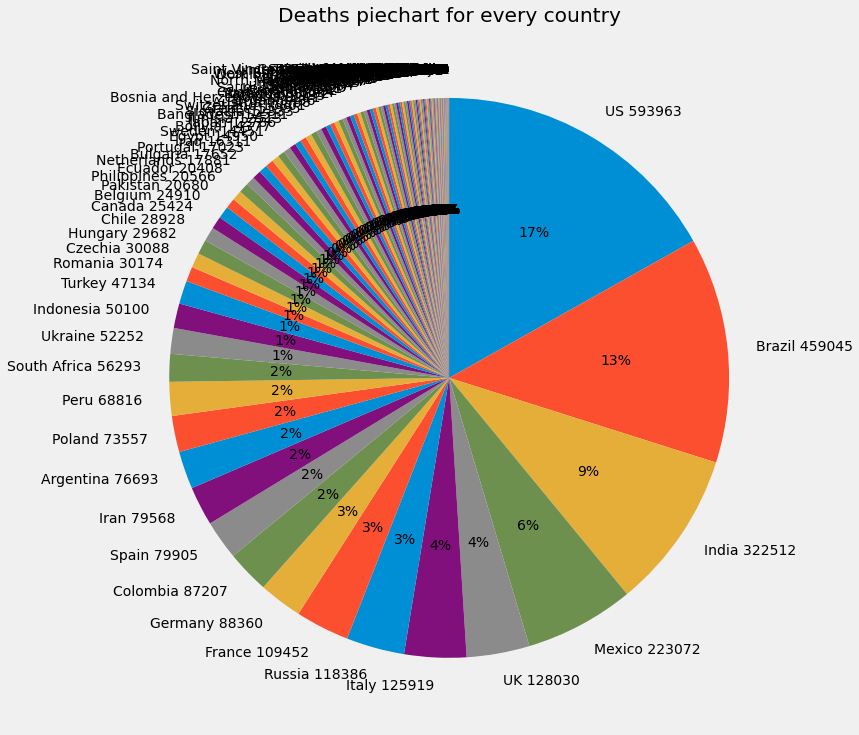

In [35]:
piechart('Deaths')

World total:  11400


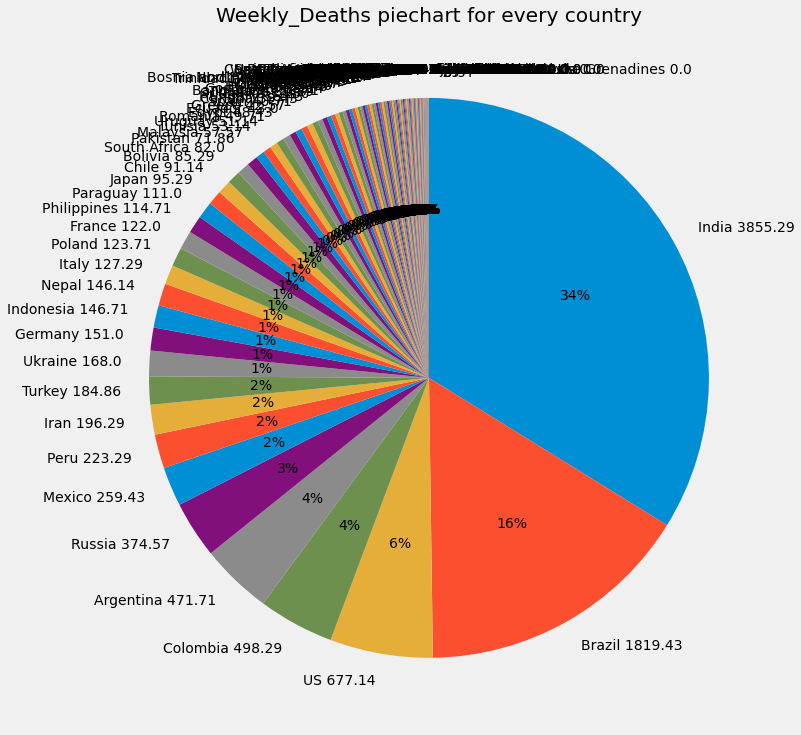

In [36]:
piechart('Weekly_Deaths')

World total:  11913


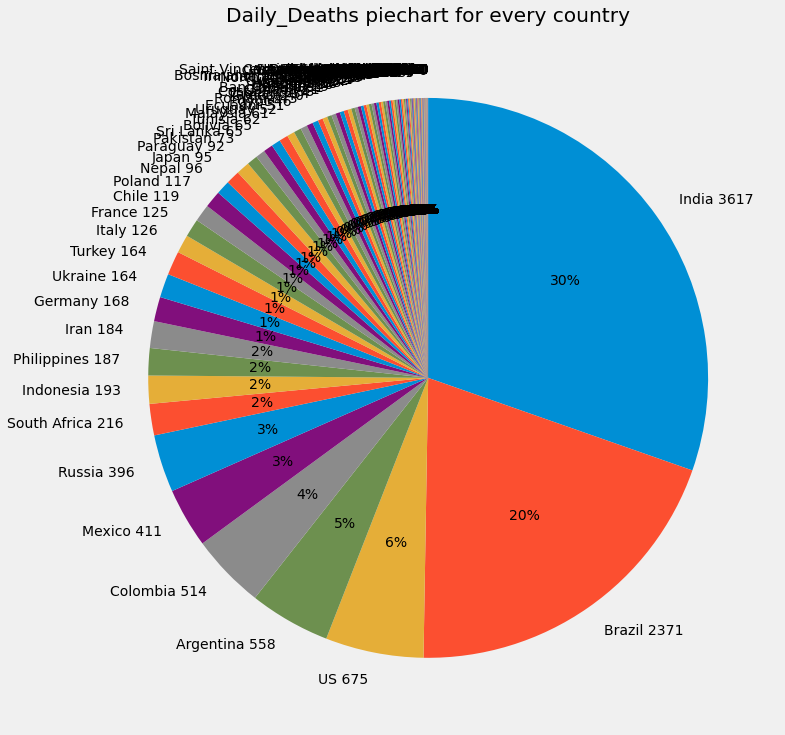

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-05-29


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

704623400.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 42f6d92] `date` update
 1 file changed, 1999 insertions(+), 1999 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (71%)


To https://github.com/Arrowheadahp/COVID-19.git
   ef5ec0c..42f6d92  master -> master
